# Browsing Wikipedia
In this short notebook we use the module browse_wiki in order to browse through Wikipedias websites. For a random choice of sites we will determine network statistics such as a website's connectivity, centrality,.. and illustrate the connectivity by plotting the associated Digraphs.  
We remark that browsing the web is relatively slow. This is because the function requests.get() is relatively slow. Try to lower the limit value in order to get a deeper graph.

In [9]:
import numpy as np
import browse_wikipedia as bw
import time

We initialize our search with a Wikipedia entry. @num_pred determines the number of predecessors we look for in each step. The longest path in the graph is bounded by $\text{limit}^{\text{steps}}$. In order to obtain useful information one should find an equilibrium between these two parameters. 

In [10]:
name_init = "Python_(programming_language)"
num_pred = 2
steps = 26
conn = dict()
conn = bw.get_predecessors(name_init, conn, num_pred)
print(conn)

{'Python_(programming_language)': ['Ada_(programming_language)', 'Algorithms_for_calculating_variance']}


Now we browse Wikipedia. get_all_predecessors(conn, num_pred) takes a dictionary @conn whose keys are Wikipedia entries and the value of each key is a list of entries which are linked to the respective key. A simple example is the printout above. It returns a dictionary where all keys and values of @conn are now keys and the value of each key is a list of entries which are linked to the respective key again. Repeating the application of get_all_predecessors yields larger graphs with (potentially) longer paths.

In [11]:
for k in range(steps):
    conn = bw.get_all_predecessors(conn, num_pred)

First transform the incidence list given by the dictionary conn into an adjacency matrix.

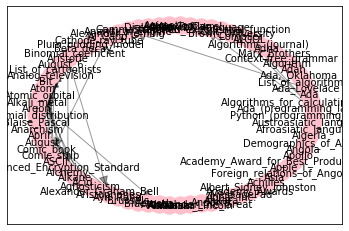

In [12]:
adj, nv = bw.inc2adj(conn)
bw.plot_digraph(adj, nv)

This graph is obviously far too large in order to obtain useful information. Hence, let us reduce the graph with respect to some network centrality. Below, we choose the eigenvector centrality. Any centrality of your choice can be used as well. The last argument $x$ of the reduction function is related to the threshold as follows: all nodes with centrality value below $x\times\max(centrality)$ are discarded. So for $x=1$ all nodes are discarded and for $x=0$ none is discarded. Depending on the graph different values of $x$ can be useful.

dict_keys(['Adah', 'Adha', 'Ada', 'Context-free_grammar', 'Ada_(programming_language)', 'ALGOL', 'Compiler', 'Assembly_language', 'Python_(programming_language)', 'Ada_Lovelace', 'Ada,_Oklahoma', 'List_of_algorithms'])


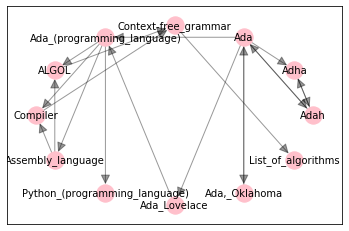

In [13]:
adj_new, names = bw.reduce_graph(adj, nv, bw.eigenvector_centrality, 0.4)
print(names.keys())
bw.plot_digraph(adj_new, names)

In many cases, hundreds to thousands of Wiki entries are linked to a given entry. It would be far too time consuming to consider all of them. Hence, the positional argument @num_pred in the function @get_predecessors. However, as can be seen in the first application of @get_predecessors above, the function takes the first @num_pred  entries from an aplhabetical list of linked entries (given by Wikipedia). Obviously, these entries must not be the most important from the whole list. This downside is tackled in the function @get_pred_ranked: Here, only the @num_pred linked entries with most views in the last 30 days are returned. Let us see what results we obtain when we repeat the above with the modified method:

In [15]:
name_init = "Python_(programming_language)"
num_pred = 2
steps = 26
conn = dict()
conn = bw.get_pred_ranked(name_init, conn, num_pred)
print(conn)

{'Python_(programming_language)': ['Java_(programming_language)', 'Monty_Python']}


The next step is iterating the function:

In [16]:
steps = 4
for k in range(steps):
    conn = bw.get_all_predecessors(conn, num_pred, method=bw.get_pred_ranked)

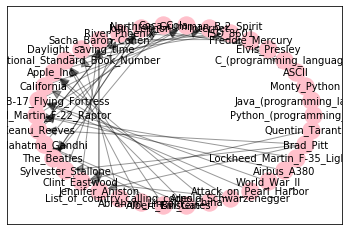

In [17]:
adj, nv = bw.inc2adj(conn)
bw.plot_digraph(adj, nv)

dict_keys(['Python_(programming_language)', 'Monty_Python', 'Elvis_Presley', 'John_Lennon', 'The_Beatles'])


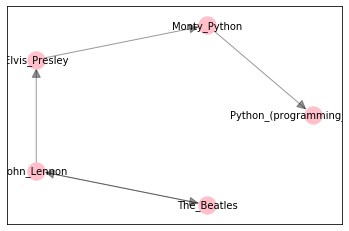

In [18]:
adj_new, names = bw.reduce_graph(adj, nv, bw.eigenvector_centrality, 0.4)
print(names.keys())
bw.plot_digraph(adj_new, names)